In [382]:
import pandas as pd
from sklearn import preprocessing,svm,cross_validation,datasets
import quandl
import math,datetime,calendar
import numpy
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import statsmodels.api as smapi
style.use('ggplot')
%matplotlib inline  
quandl.ApiConfig.api_key = 'APaiSW1DMjcurrYGmfcd' 
def linreg(y, x):
    X = smapi.add_constant(x)
    model = smapi.OLS(y, X).fit()
    a = model.params[0]
    b = model.params[1]
    X = X[:, 1]
    return model

In [546]:
df=quandl.get('WIKI/TSLA')


In [547]:
df=df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [548]:
close_ret = (df['Adj. Close']).pct_change()

In [549]:
df['HL_PCT']=(df['Adj. High']-df['Adj. Low'])/df['Adj. Low']
df['PCT_change']=(df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']
df['Close_Ret'] = close_ret

In [550]:
df=df[['HL_PCT','PCT_change', 'Close_Ret', 'Adj. Close', 'Adj. Volume']]

In [551]:
forecast_col='Adj. Close'
df.fillna(-99999,inplace=True)

In [552]:
forecast_out=10

In [553]:
df['label']=df[forecast_col].shift(-forecast_out)
df=df.iloc[1:]

In [554]:
print df.drop(['label'], 1).iloc[-10:].values

[[  2.75764141e-02  -1.42203147e-02  -1.44740982e-02   3.44530000e+02
    4.05898300e+06]
 [  2.62920367e-02   1.33822764e-02   1.76472296e-02   3.50610000e+02
    4.21999700e+06]
 [  2.18521765e-02  -1.60176509e-02  -2.05641596e-02   3.43400000e+02
    3.24880300e+06]
 [  3.91714286e-02   3.51216735e-02   5.90856144e-02   3.63690000e+02
    7.61030900e+06]
 [  2.31964484e-02  -4.77379352e-03  -2.58461877e-03   3.62750000e+02
    5.92928900e+06]
 [  2.35824133e-02   6.62415480e-03   9.59338387e-03   3.66230000e+02
    4.16138200e+06]
 [  4.22744947e-02   3.65328137e-02   3.11552849e-02   3.77640000e+02
    7.14166300e+06]
 [  1.95867990e-02   1.41518251e-02   5.74621332e-03   3.79810000e+02
    5.33867800e+06]
 [  3.15875874e-02   1.24917817e-02   1.36647271e-02   3.85000000e+02
    7.14929500e+06]
 [  2.36100329e-02  -1.28947368e-02  -2.57142857e-02   3.75100000e+02
    6.25603500e+06]]


In [533]:
X=np.array(df.drop(['label'],1))
# X=preprocessing.scale(X)
X_lately=X[-forecast_out:] # last n days of data
X=X[:-forecast_out] # data up to length - n days of data
df = df.iloc[:-forecast_out]
y=np.array(df.label)

In [534]:
len(df.label) , len(X)

(1809, 1809)

In [535]:
# splitting the data into 80% training and 20% test
x_train,x_test,y_train,y_test=cross_validation.train_test_split(X,y,test_size=0.2) 

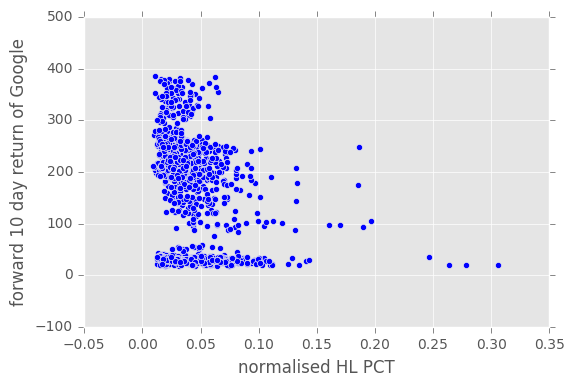

In [536]:
plt.scatter(x_train[:,0],y_train)
plt.xlabel('normalised HL PCT')
plt.ylabel('forward 10 day return of Google')

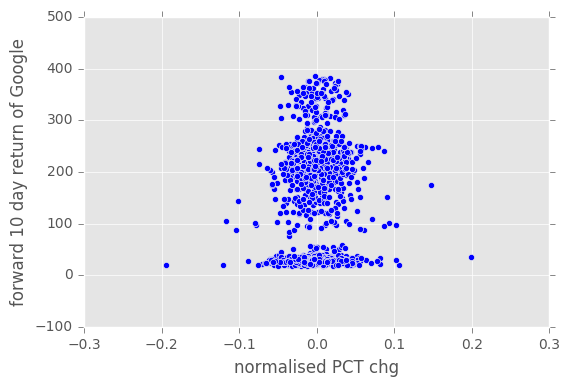

In [537]:
plt.scatter(x_train[:,1],y_train)
plt.xlabel('normalised PCT chg')
plt.ylabel('forward 10 day return of Google')

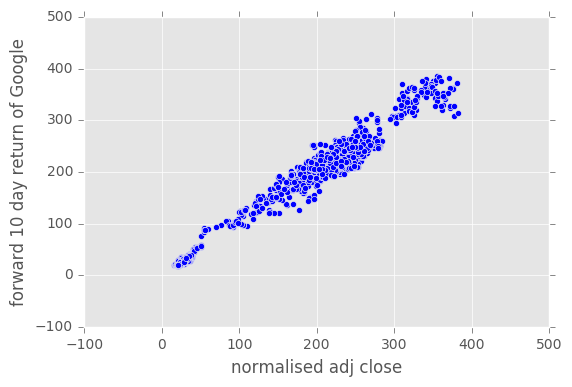

In [538]:
plt.scatter(x_train[:,3],y_train)
plt.xlabel('normalised adj close')
plt.ylabel('forward 10 day return of Google')

In [539]:
clf=LinearRegression() # Initialising linear regression class object
clf.fit(x_train,y_train) #Creating a linear regression equation
accuracy=clf.score(x_test,y_test)
print accuracy

0.977225033209


In [555]:
forecast_set=clf.predict(df.drop(['label'], 1).iloc[-10:].values)

In [556]:
print(forecast_set,accuracy,forecast_out)
df['Forecast']=np.nan

(array([ 344.84147051,  351.35311197,  343.33272596,  366.25912945,
        363.96899778,  366.74536657,  379.52973319,  380.76570292,
        386.71741892,  376.09345169]), 0.97722503320862919, 10)


In [557]:
last_date=df.iloc[-1].name
last_unix=calendar.timegm(last_date.utctimetuple())
one_day=86400
next_unix=last_unix+one_day

In [558]:
for i in forecast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+ [i]

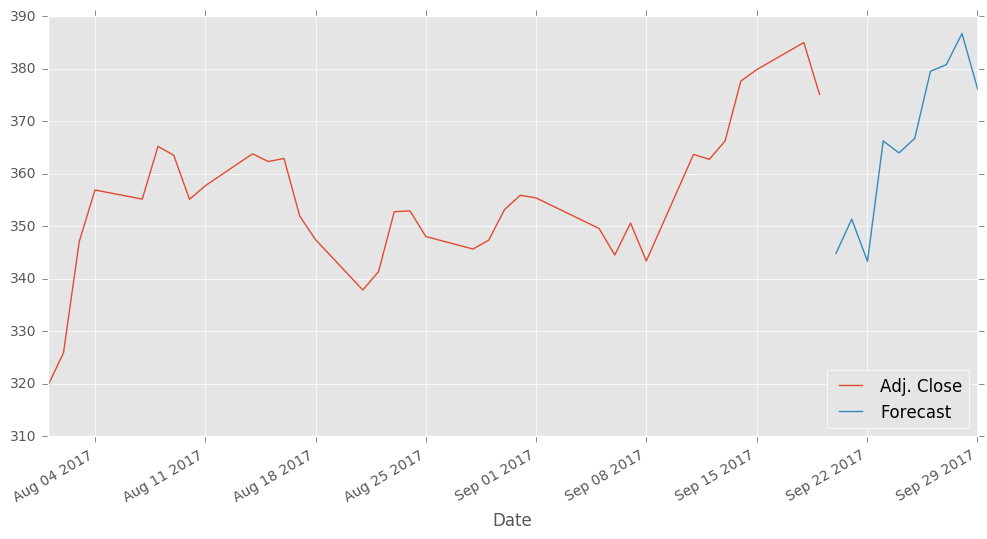

In [559]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
df=df['2017-08':]
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')

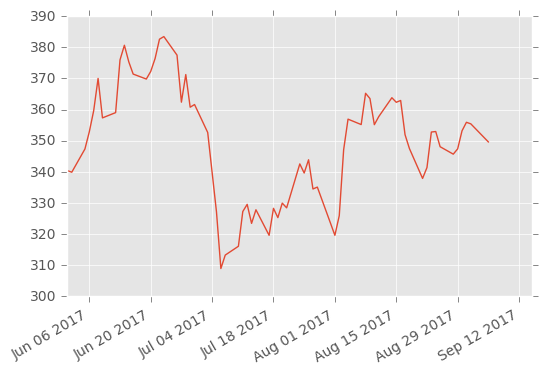

In [232]:
df['Adj. Close']['2017':].plot()

In [233]:
digits=datasets.load_digits()

In [234]:
clf=svm.SVC(gamma=0.001,C=100)

In [11]:
x,y=digits.data[:-1],digits.target[:-1]

In [203]:
model = linreg(y_train, x_train)

In [220]:
np.sum(model.params[1:] * X_lately[5,:]) + model.params[0]

349.52437961102942

In [285]:
np.shape(x_test)

(362L, 5L)